## Amit Lahat Python Project 10.6.23

## working with online data 

In this project , we will load , clean and store online flights data.
We will also look for presentable insights and graph them. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

In [2]:
import requests
import json

# Load the data

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
df = pd.DataFrame(res['result']['records'])

In [6]:
df

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,LY,5142,EL AL ISRAEL AIRLINES,2023-06-29T18:15:00,2023-06-29T18:16:00,A,LCA,LARNACA,לרנקה,LARNACA,קפריסין,CYPRUS,3,None,None,LANDED,נחתה
1,2,LY,375,EL AL ISRAEL AIRLINES,2023-06-29T17:05:00,2023-06-29T18:18:00,D,LIS,LISBON,ליסבון,LISBON,פורטוגל,PORTUGAL,3,78-99,D,DEPARTED,המריאה
2,3,TP,8920,AIR PORTUGAL,2023-06-29T17:05:00,2023-06-29T18:18:00,D,LIS,LISBON,ליסבון,LISBON,פורטוגל,PORTUGAL,3,78-99,D,DEPARTED,המריאה
3,4,IZ,161,ARKIA ISRAELI AIRLINES,2023-06-29T17:40:00,2023-06-29T18:20:00,D,LCA,LARNACA,לרנקה,LARNACA,קפריסין,CYPRUS,1,309-315,A,DEPARTED,המריאה
4,5,IZ,1801,ARKIA ISRAELI AIRLINES,2023-06-29T18:20:00,2023-06-29T18:20:00,D,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,342-348,B,CANCELED,מבוטלת
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,2813,EJU,4657,EASYJET EUROPE AIRLINE,2023-07-03T18:15:00,2023-07-03T18:15:00,A,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,None,None,NOT FINAL,לא סופי
2813,2814,FR,2005,RYANAIR,2023-07-03T18:15:00,2023-07-03T18:15:00,A,BGY,BERGAMO,ברגמו,BERGAMO,איטליה,ITALY,3,None,None,NOT FINAL,לא סופי
2814,2815,LX,253,SWISS INT`L AIRLINES,2023-07-03T18:15:00,2023-07-03T18:15:00,D,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,None,None,ON TIME,בזמן
2815,2816,LY,5194,EL AL ISRAEL AIRLINES,2023-07-03T18:15:00,2023-07-03T18:15:00,A,SSH,SHARM EL SHEIKH,שארם אל-שייח,SHARM EL SHEIKH,מצרים,EGYPT,3,None,None,NOT FINAL,לא סופי


## display the first rows 

In [7]:
df.head(5)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,LY,5142,EL AL ISRAEL AIRLINES,2023-06-29T18:15:00,2023-06-29T18:16:00,A,LCA,LARNACA,לרנקה,LARNACA,קפריסין,CYPRUS,3,None,None,LANDED,נחתה
1,2,LY,375,EL AL ISRAEL AIRLINES,2023-06-29T17:05:00,2023-06-29T18:18:00,D,LIS,LISBON,ליסבון,LISBON,פורטוגל,PORTUGAL,3,78-99,D,DEPARTED,המריאה
2,3,TP,8920,AIR PORTUGAL,2023-06-29T17:05:00,2023-06-29T18:18:00,D,LIS,LISBON,ליסבון,LISBON,פורטוגל,PORTUGAL,3,78-99,D,DEPARTED,המריאה
3,4,IZ,161,ARKIA ISRAELI AIRLINES,2023-06-29T17:40:00,2023-06-29T18:20:00,D,LCA,LARNACA,לרנקה,LARNACA,קפריסין,CYPRUS,1,309-315,A,DEPARTED,המריאה
4,5,IZ,1801,ARKIA ISRAELI AIRLINES,2023-06-29T18:20:00,2023-06-29T18:20:00,D,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,342-348,B,CANCELED,מבוטלת


# clean the data

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [9]:
for i in df.columns:
    if df[df[i].isna()==True].shape[0]/df[i].shape[0]>0:
        print (f'Column: {i} containing ' + (str(round(df[df[i].isna()==True].shape[0]/df[i].shape[0]*100,2)) + '% empyty rows'))

Column: CHCINT containing 60.49% empyty rows
Column: CHCKZN containing 60.49% empyty rows


drop the empty rows  

In [10]:
i1 = df[df.CHCINT.isna()==True].index
i2 = df[df.CHCKZN.isna()==True].index
i3 = i1 | i2
df.drop(index=i3, inplace=True)

format the current date with underscore separation (%d_%m_%y)

In [11]:
CurrentDate = datetime.datetime.now().date().strftime("%d_%m_%Y")
CurrentDate

'30_06_2023'

Drop the _id column 

In [12]:
df.drop(columns=['_id'], inplace=True)

save the raw data (add the current date to the file name) 

In [13]:
#df.to_csv('dfUpd_10_06_2023.csv', index=False)

select the airline code and name without duplicates (CHOPER,CHOPERD)

In [14]:
NameCode = df[['CHOPER','CHOPERD']].drop_duplicates()
NameCode

,CHOPER,CHOPERD
1,LY,EL AL ISRAEL AIRLINES
2,TP,AIR PORTUGAL
3,IZ,ARKIA ISRAELI AIRLINES
6,6H,ISRAIR AIRLINES
8,AR,AEROLINEAS ARGENTINAS S.A.
...,...,...
1883,BUC,EUROPEAN AIR CHARTER
1890,SM,AIR CAIRO
1913,GF,GULF AIR - BAHREIN
1914,HU,HAINAN AIRLINES


Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [15]:
airlines = pd.read_csv('airlines.csv')
airlinesUpd = pd.concat([airlines,NameCode]).drop_duplicates()
airlinesUpd 
#airlinesUpd.to_csv('airlinesUpd_10_06_2023.csv', index=False) 

,CHOPER,CHOPERD
0,PC,PEGASUS AIRLINES
1,LY,EL AL ISRAEL AIRLINES
2,TK,TURKISH AIRLINES
3,LX,SWISS INT`L AIRLINES
4,FB,BULGARIA AIR
...,...,...
642,AYT,AYIT AVIATION
889,KE,KOREAN AIR
972,KM,AIR MALTA
1103,FI,ICELAND AIR


Drop the Airline name column 

In [16]:
df.drop(columns=['CHOPERD'], inplace=True)

Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [17]:
airports = pd.read_csv('airports.csv')
NameCode.rename(columns={'CHOPER':'CHLOC1','CHOPERD':'CHLOC1D'}, inplace=True)
airportsUpd = pd.concat([airports,NameCode]).drop_duplicates()
airportsUpd
#airportsUpd.to_csv('airportsUpd_10_06_2023.csv', index=False) 

,CHLOC1,CHLOC1D
0,SAW,ISTANBUL-SABIHA GOKCHEN
1,PRG,PRAGUE-RUZYNE
2,IST,ISTANBUL
3,ZRH,ZURICH
4,SOF,SOFIA
...,...,...
1883,BUC,EUROPEAN AIR CHARTER
1890,SM,AIR CAIRO
1913,GF,GULF AIR - BAHREIN
1914,HU,HAINAN AIRLINES


drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [18]:
df.drop(columns=['CHLOC1TH','CHLOC1CH','CHRMINH'], inplace=True)

### rename the columns 

In [19]:
labels = {'CHOPER':'Airline','CHFLTN':'FlightNum','CHSTOL':'PlanTime','CHPTOL':'ActualTime','CHAORD':'Direction','CHLOC1':'Airport','CHLOC1T':'City','CHLOCCT':'Country','CHTERM':'Terminal','CHRMINE':'Status'}
df.rename(columns=labels, inplace=True)
df.head(1)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,CHLOC1D,City,Country,Terminal,CHCINT,CHCKZN,Status
1,LY,375,2023-06-29T17:05:00,2023-06-29T18:18:00,D,LIS,LISBON,LISBON,PORTUGAL,3,78-99,D,DEPARTED


Change the PlanTime and ActualTime columns type to np.datetime64

In [20]:
df.PlanTime = df.PlanTime.astype('datetime64[ns]')
df.ActualTime = df.ActualTime.astype('datetime64[ns]')

Save the clean data to new file clean.csv

In [21]:
#df.to_csv('clean_10_06_2023.csv', index=False) 

update the file final.csv with departed, landed and canceled flights only

In [22]:
final = pd.read_csv('final.csv')
final = final[final['Status'].isin(['DEPARTED', 'LANDED', 'CANCELED'])]
final.Status.unique()

array(['LANDED', 'CANCELED', 'DEPARTED'], dtype=object)

Add a new column for total delay in minutes

In [23]:
DelayedIndex = df[(df.ActualTime.astype('datetime64[ns]')-df.PlanTime.astype('datetime64[ns]')).dt.total_seconds()//60>0].index
df['DelayMinutes'] = (df.ActualTime.astype('datetime64[ns]')-df.PlanTime.astype('datetime64[ns]')).dt.total_seconds().loc[DelayedIndex]//60
df.head(2)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,CHLOC1D,City,Country,Terminal,CHCINT,CHCKZN,Status,DelayMinutes
1,LY,375,2023-06-29 17:05:00,2023-06-29 18:18:00,D,LIS,LISBON,LISBON,PORTUGAL,3,78-99,D,DEPARTED,73.0
2,TP,8920,2023-06-29 17:05:00,2023-06-29 18:18:00,D,LIS,LISBON,LISBON,PORTUGAL,3,78-99,D,DEPARTED,73.0


What is the average delay for departed flights

In [24]:
df[df['Status']=='DEPARTED'].DelayMinutes.mean() #avg of delayed flights only

44.37057220708447

Display total delay distribution (Airlines , Terminals, Date)

In [25]:
# The Data recieved contain planned flights, therefore filter to show and sum only row with delay
AirlineDelay = df[df.DelayMinutes>0].groupby('Airline').sum('DelayMinutes')
TerminalDelay = df[df.DelayMinutes>0].groupby('Terminal').sum('DelayMinutes')
df['PlanDate'] = pd.to_datetime(df['PlanTime']).dt.date
DateDelay = df[df.DelayMinutes>0].groupby('PlanDate').sum('DelayMinutes')

In [26]:
AirlineDelay

,DelayMinutes
Airline,
2S,64.0
5W,98.0
6E,156.0
6H,1465.0
A3,307.0
...,...
W6,814.0
W9,116.0
WZ,221.0


In [27]:
TerminalDelay

,DelayMinutes
Terminal,
1,4315.0
3,14179.0


In [28]:
DateDelay

,DelayMinutes
PlanDate,
2023-06-29,4263.0
2023-06-30,14111.0
2023-07-01,120.0


### create 3 diffrent visualizations with your analyzation

In [29]:
df['PlannedHour'] = df.PlanTime.astype('datetime64[ns]').dt.hour
count_filter = 3  
airline_counts = df['Airline'].value_counts()
mask1 = df['Airline'].isin(airline_counts[airline_counts > count_filter].index)
x3 = list(df[mask1].groupby('Airline').DelayMinutes.mean().sort_values(ascending=False).to_frame().fillna(0).index)
df3nUp = df[df.Airline.isin(x3)] #Airlines with more than 3 flights in data

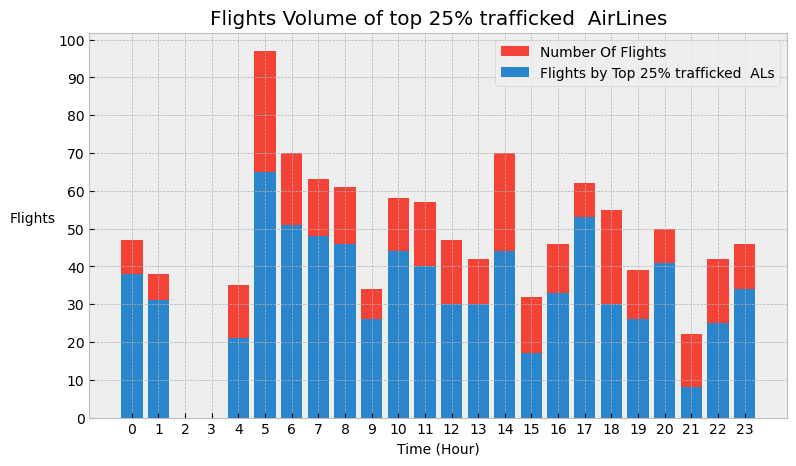

We can clearly see that 25% of Airlines make up for about half of the flights.
We should give priority and reserve half of the Check-in stations for those top 25% trafficked Airlines


In [30]:
TopQuarter = round(df.Airline.nunique()/4)
FlightsPerHour = df.groupby('PlannedHour').Airline.count() 
Top22TrafficALs = list(df.groupby('Airline').FlightNum.count().sort_values(ascending=False).head(TopQuarter).index)
HighTrafficALPerHour = df[df.Airline.isin(Top22TrafficALs)].groupby('PlannedHour').Airline.count()

plt.figure(figsize=(9,5))
plt.style.use('bmh')
plt.xticks(range(0,24,1))
plt.yticks(range(0,FlightsPerHour.values.max()+10,10))
plt.bar(FlightsPerHour.index, FlightsPerHour.values, color='#f44336',label='Number Of Flights')
plt.bar(HighTrafficALPerHour.index, HighTrafficALPerHour.values, color='#2986cc',label='Flights by Top 25% trafficked  ALs')
plt.title('Flights Volume of top 25% trafficked  AirLines')
plt.xlabel('Time (Hour)')
plt.ylabel('Flights', rotation=0, labelpad=18)

plt.legend()
plt.show()
print('We can clearly see that 25% of Airlines make up for about half of the flights.\n'+
      'We should give priority and reserve half of the Check-in stations for those top 25% trafficked Airlines')

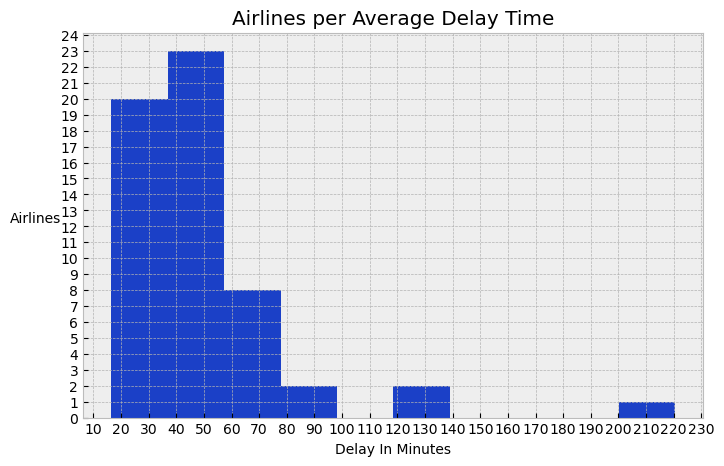

We can see a common range of delay times
should keep track of Airlines which often gap above the range.


In [33]:
count_filter = 3
airline_counts = df['Airline'].value_counts()
mask1 = df['Airline'].isin(airline_counts[airline_counts > count_filter].index)
x3 = list(df[mask1].groupby('Airline').DelayMinutes.mean().sort_values(ascending=False).to_frame().fillna(0).index)
df3nUp = df[df.Airline.isin(x3)]
AvgDelay3nUp = df3nUp.groupby('Airline').DelayMinutes.mean().to_frame().sort_values('DelayMinutes')

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.xticks(range(0,1000,10))
plt.yticks(range(0,1000,1))
plt.title('Airlines per Average Delay Time')
plt.xlabel('Delay In Minutes')
plt.ylabel('Airlines', rotation=0, labelpad=18)
plt.hist(AvgDelay3nUp, color='#1B40C7', bins=10)
plt.show()
print('We can see a common range of delay times\nshould keep track of Airlines which often gap above the range.')

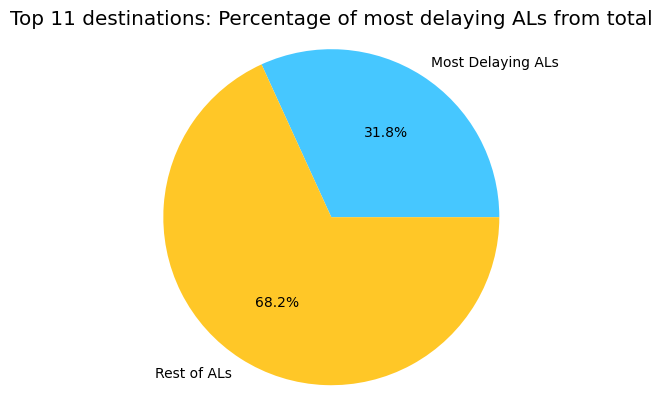

We have 11 destinations above the 75% point of destinations by traffic,
with 31.8% of their Airlines being in the top 75% of airlines with the highest delay times


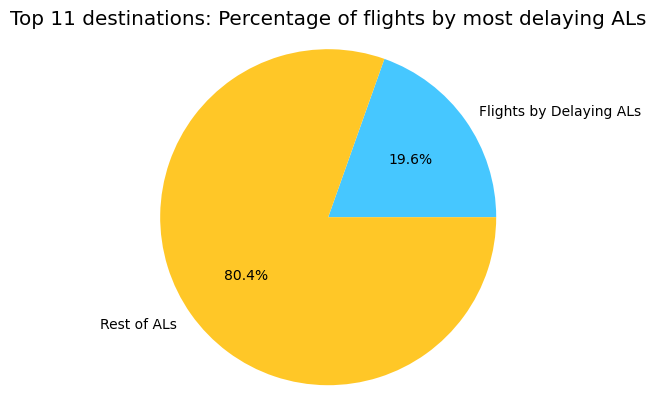

We have 11 destinations above the 75% point of destinations by traffic,
19.6% of their flights are by airlines in the top 75% of highest delay times.
Best to keep a low percentage to avoid cummulative delay times.


In [34]:
AvgALDelay3nUp = df3nUp.groupby('Airline').DelayMinutes.mean().to_frame().sort_values('DelayMinutes').dropna()
AvgALDelay75Percent3nUp = np.percentile(AvgALDelay3nUp, 75)
ALsAbove75PDelaysAvg3nUp = list(df3nUp.groupby('Airline').DelayMinutes.mean()[df.groupby('Airline').DelayMinutes.mean()>AvgALDelay75Percent3nUp].index)
top75percFlightsToCounter = np.percentile(df3nUp.groupby('Country').Airline.count().sort_values(), 75)
CountriesAbove75PFlights = list(df.groupby('Country').count()[df.groupby('Country').Airline.count()>top75percFlightsToCounter].Airline.index)
dftopcountry = df[df.Country.isin(CountriesAbove75PFlights)]

common_values = len(ALsAbove75PDelaysAvg3nUp)
total_values = len(list(df3nUp[df3nUp.Country.isin(CountriesAbove75PFlights)].Airline.drop_duplicates()))

percentage_common = (common_values / total_values) * 100
percentage_other = 100 - percentage_common
labels = ['Most Delaying ALs', 'Rest of ALs']
sizes = [percentage_common, percentage_other]
colors = ['#46C7FF', '#FFC727']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top '+str(len(CountriesAbove75PFlights))+' destinations: Percentage of most delaying ALs from total')
plt.show()
print('We have '+str(len(CountriesAbove75PFlights))+' destinations above the 75% point of destinations by traffic,\n'+
      'with '+str(round(percentage_common,1))+'% of their Airlines being in the top 75% of airlines with the highest delay times')

common_values = dftopcountry[dftopcountry.Airline.isin(ALsAbove75PDelaysAvg3nUp)].shape[0]
total_values = dftopcountry.shape[0]

percentage_common = (common_values / total_values) * 100
percentage_other = 100 - percentage_common
labels = ['Flights by Delaying ALs', 'Rest of ALs']
sizes = [percentage_common, percentage_other]
colors = ['#46C7FF', '#FFC727']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top '+str(len(CountriesAbove75PFlights))+' destinations: Percentage of flights by most delaying ALs')
plt.show()
print('We have '+str(len(CountriesAbove75PFlights))+' destinations above the 75% point of destinations by traffic,\n'+
      str(round(percentage_common,1))+'% of their flights are by airlines in the top 75% of highest delay times.\n'+
      'Best to keep a low percentage to avoid cummulative delay times.')